## Problema 2

Para el átomo de Hidrógeno en un campo eléctrico estático externo $\boldsymbol{\vec{E}} = E_0\; ẑ$ y $n = 3$, determine
para el primer orden de pertubación:

## a) Los elementos de matriz asociados al operador $\hat{W}_S$

### Solución:

Los estados de la base que vamos a usar son
\begin{equation}
\{ |3,0,0\rangle; \;\;|3,1,-1\rangle ; |3,1,0\rangle; |3,1,1\rangle; \;\;|3,2,-2\rangle; |3,2,-1\rangle; |3,2,0\rangle; |3,2,1\rangle; |3,2,2\rangle\}
\end{equation}

La perturbación es la interacción entre el momento dipolar $q\boldsymbol{\hat{\vec{R}}}$ y el campo $\boldsymbol{\vec{E}} = E_0\; ẑ$:
$$
    \hat{W}_S = -q \boldsymbol{\vec{E}} \cdot \boldsymbol{\hat{\vec{R}}} = -q E_0 \hat{Z}
$$

Si recordamos que en la base de posiciones y en coordenadas esféricas $\hat{Z}=r\cos{\theta}$, entonces los elementos de matriz van a ser de la forma:
$$
    \langle3,l,m| \hat{W}_S |3,l',m'\rangle = -qE_0\langle3,l,m| \hat{Z} |3,l',m'\rangle
$$

$$
    \langle3,l,m| \hat{Z} |3,l',m'\rangle = \int^\infty_{0}R_{3,l}(r)\;r \;R_{3,l'}(r)\;r^2\;dr \; \int^{2\pi}_0 \int^\pi_0 Y^{m*}_l(\theta,\phi)\;\cos{(\theta)}\;Y^{m'}_{l'}(\theta,\phi)\; \sin{\theta} \; d\theta \; d\phi
$$

En donde
$$
    R_{n,l}(r) = -\left[ \left( \frac{2Z}{na_\mu} \right)^3 \frac{(n-l-1)!}{2n[(n+l)!]} \right]^{1/2} \; e^{-\rho/2} \; \rho^l \; L^{2l+1}_{n-l-1}(\rho)
$$

con
$$
    \rho = \frac{2Z}{na_\mu}r, \hspace{2cm} a_\mu = \frac{(4\pi\epsilon_0)\hbar^2}{\mu e^2}, \hspace{2cm} \mu = \frac{mM}{m+M}
$$

Primero importo las librerías que voy a ocupar:

In [12]:
import numpy as np

import scipy as sp
from scipy.special import assoc_laguerre as laguerre

from scipy.special import sph_harm_y as sph_harm
from scipy.special import factorial as fact

import sympy as sym

Defino las constantes:

In [13]:
E_0 = sym.Symbol("E_0", real=True, positive=True)            # Magnitud del campo eléctrico9
hbar = sym.Symbol("hbar", real=True, positive=True)          # Constante de Planck reducida 
q = sym.Symbol("q", real=True, positive=True)                # Carga del electrón
a_0 = sym.Symbol("a_0", real=True, positive=True)            # Radio de Bohr (lo igualo a 1 y al final lo coloco a mano) 
const = a_0*q*E_0                                            # Constante que va a estar multiplicando la matriz W_S y los autovalores

Defino las funciones de la parte radial $\rho_n(r)$ y $R_{n,l}(r)$

In [14]:
def rho(r, n, Z):
    return 2 * Z * r / (n)

def R(r, n, l, Z):
    return -np.sqrt( (2*Z/(n))**3 * fact(n-l-1) / (2*n * fact(n+l))) * np.exp(-rho(r,n, Z)/2) * rho(r,n, Z)**l * laguerre(rho(r,n, Z), n-l-1, 2*l+1)

Ahora daclaro las funciones que definen los integrandos de las integrales de la parte radial(integral simple) y angular(integral doble)

In [15]:
def R_integrand(r, n, l, l_pri, Z):
    return R(r, n, l, Z) * r * R(r, n, l_pri, Z) * r**2

def Ang_integrand(theta, phi, l, m, l_pri, m_pri):
    return np.real(np.conjugate(sph_harm( l, m, theta, phi)) * np.cos(theta) * sph_harm(l_pri, m_pri, theta, phi) * np.sin(theta))

Ahora defino el número cuántico $n$ y el número de protones $Z$, en este caso tenemos $n=3$ y $Z=1$

In [16]:
n = 3
Z = 1

In [18]:
# Creamos la matriz que va a representar a W_S 
W_S = np.zeros((n**2,n**2))

# Defino las variables `row` y `col` para recorrer la matriz
row = 0
col = 0

# Y ahora recorro los l, m, l' y m' para calcular los elementos de matriz

for l in range(n):
    for m in range(-l,l+1):
        for l_pri in range(n):
            for m_pri in range(-l_pri,l_pri+1):

                radial = sp.integrate.quad(R_integrand, 0, np.inf, args=(n,l,l_pri, Z))
                angular = sp.integrate.dblquad(Ang_integrand, 0, 2*np.pi, 0, np.pi, args=(l, m, l_pri, m_pri))

                matrix_elem = radial[0] * angular[0]

                W_S[row,col] = np.round(matrix_elem, 2) if np.absolute(matrix_elem) > 1e-5 else 0

                col += 1

        row += 1
        col = 0

Por último imprimimos la matriz con sympy (uso en lugar de numpy solo para que se vea más estético)

In [11]:
sym.Matrix(-const*W_S)

Matrix([
[             0,             0, 7.35*E_0*a_0*q,             0, 0,             0,             0,             0, 0],
[             0,             0,              0,             0, 0, 4.5*E_0*a_0*q,             0,             0, 0],
[7.35*E_0*a_0*q,             0,              0,             0, 0,             0, 5.2*E_0*a_0*q,             0, 0],
[             0,             0,              0,             0, 0,             0,             0, 4.5*E_0*a_0*q, 0],
[             0,             0,              0,             0, 0,             0,             0,             0, 0],
[             0, 4.5*E_0*a_0*q,              0,             0, 0,             0,             0,             0, 0],
[             0,             0,  5.2*E_0*a_0*q,             0, 0,             0,             0,             0, 0],
[             0,             0,              0, 4.5*E_0*a_0*q, 0,             0,             0,             0, 0],
[             0,             0,              0,             0, 0,      

## b) Los valores de energía y las funciones de onda asociadas

### Solución



Calculamos las correcciones a la energía calculando los autovalores de la matriz:

In [8]:
eigenval = np.round(np.linalg.eig(W_S).eigenvalues, 2)
sym.Matrix(eigenval*const)

Matrix([
[-9.0*E_0*a_0*q],
[ 9.0*E_0*a_0*q],
[             0],
[ 4.5*E_0*a_0*q],
[-4.5*E_0*a_0*q],
[ 4.5*E_0*a_0*q],
[-4.5*E_0*a_0*q],
[             0],
[             0]])

Calculamos las funciones de onda asociadas calculando los autovectores con ``Numpy``:

In [9]:
eigenvec = np.round(np.linalg.eig(W_S).eigenvectors, 2)
sym.Matrix(eigenvec)

Matrix([
[0.58, -0.58, -0.58,   0.0,  0.0,   0.0,  0.0, 0.0, 0.0],
[ 0.0,   0.0,   0.0,   0.0,  0.0, -0.71, 0.71, 0.0, 0.0],
[0.71,  0.71,   0.0,   0.0,  0.0,   0.0,  0.0, 0.0, 0.0],
[ 0.0,   0.0,   0.0,  0.71, 0.71,   0.0,  0.0, 0.0, 0.0],
[ 0.0,   0.0,   0.0,   0.0,  0.0,   0.0,  0.0, 1.0, 0.0],
[ 0.0,   0.0,   0.0,   0.0,  0.0,  0.71, 0.71, 0.0, 0.0],
[0.41, -0.41,  0.82,   0.0,  0.0,   0.0,  0.0, 0.0, 0.0],
[ 0.0,   0.0,   0.0, -0.71, 0.71,   0.0,  0.0, 0.0, 0.0],
[ 0.0,   0.0,   0.0,   0.0,  0.0,   0.0,  0.0, 0.0, 1.0]])

## c) Realice un esquema que se muestren las divisiones del nivel degenerado $n = 3$ e indique si persisten degeneraciones

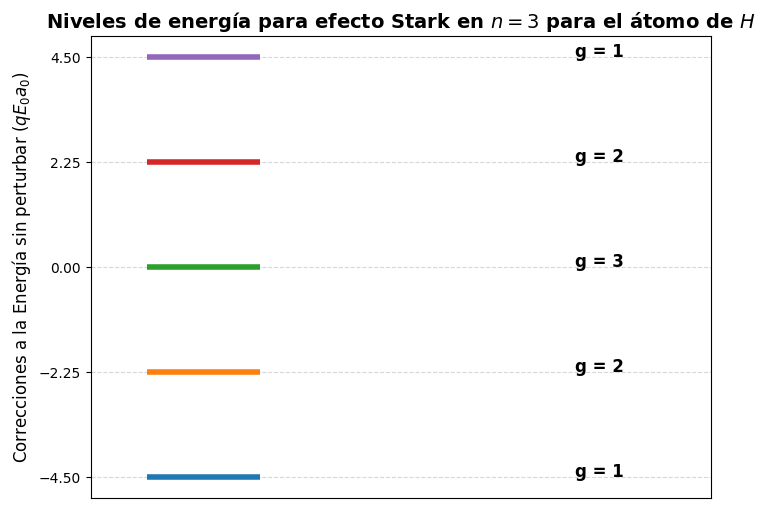

In [17]:
# Importo librerías:
import matplotlib.pyplot as plt

# Separo los autovalores unicos y cuento la degeneración:
ener_vals, degen = np.unique(eigenval, return_counts=True)

# Defino los colores que van a rotar entre subplots
colors = plt.rcParams["axes.prop_cycle"]()

# Grafico

fig, ax = plt.subplots(figsize=(8,6))

for energy, g in zip(ener_vals, degen):
    
    # Línea de nivel
    c = next(colors)["color"]
    ax.hlines(energy, 0, 1, linewidth=4, color=c)

    # Degeneración
    ax.text(3.8, energy, f"g = {g}", fontsize=12, weight="bold")

# Configuración de ejes y estilo
#ax.set_ylim(0.5, len(energyGroups)+0.5)
ax.set_xlim(-0.5, 5)
ax.set_ylabel(r"Correcciones a la Energía sin perturbar ($qE_0a_0$)", fontsize=12)
ax.set_xlabel("")
ax.set_xticks([])
ax.set_yticks(ener_vals)
ax.grid(axis="y", linestyle="--", alpha=0.5)

# Título
ax.set_title(rf"Niveles de energía para efecto Stark en $n = {n}$ para el átomo de $H$",
             fontsize=14, fontweight="bold")

plt.show()

## d) Repita el problema para los electrones del átomo de Helio

Por simplicidad vamos a trabajar con el ión de helio $He^+$, el cuál es igual al helio pero con solo un electrón, en este caso el núcleo tiene 2 protones por lo que $Z=2$:

In [11]:
Z=2

Elementos de Matriz

In [12]:
# Creamos la matriz que va a representar a W_S 
W_S = np.zeros((n**2,n**2))

# Defino las variables `row` y `col` para recorrer la matriz
row = 0
col = 0

# Y ahora recorro los l, m, l' y m' para calcular los elementos de matriz

for l in range(n):
    for m in range(-l,l+1):
        for l_pri in range(n):
            for m_pri in range(-l_pri,l_pri+1):

                radial = sp.integrate.quad(R_integrand, 0, np.inf, args=(n,l,l_pri, Z))
                angular = sp.integrate.dblquad(Ang_integrand, 0, 2*np.pi, 0, np.pi, args=(l, m, l_pri, m_pri))

                matrix_elem = radial[0] * angular[0]
                

                W_S[row,col] = np.round(matrix_elem, 2) if np.absolute(matrix_elem) > 1e-5 else 0

                col += 1

        row += 1
        col = 0

Correcciones de energía:

In [13]:
eigenval = np.round(np.linalg.eig(W_S).eigenvalues, 2)
sym.Matrix(eigenval*const)

Matrix([
[ -4.5*E_0*a_0*q],
[  4.5*E_0*a_0*q],
[              0],
[ 2.25*E_0*a_0*q],
[-2.25*E_0*a_0*q],
[ 2.25*E_0*a_0*q],
[-2.25*E_0*a_0*q],
[              0],
[              0]])

Funciones de onda asociadas:

In [14]:
eigenvec = np.round(np.linalg.eig(W_S).eigenvectors, 2)
sym.Matrix(eigenvec)

Matrix([
[0.58, -0.58, -0.58,   0.0,  0.0,   0.0,  0.0, 0.0, 0.0],
[ 0.0,   0.0,   0.0,   0.0,  0.0, -0.71, 0.71, 0.0, 0.0],
[0.71,  0.71,   0.0,   0.0,  0.0,   0.0,  0.0, 0.0, 0.0],
[ 0.0,   0.0,   0.0,  0.71, 0.71,   0.0,  0.0, 0.0, 0.0],
[ 0.0,   0.0,   0.0,   0.0,  0.0,   0.0,  0.0, 1.0, 0.0],
[ 0.0,   0.0,   0.0,   0.0,  0.0,  0.71, 0.71, 0.0, 0.0],
[0.41, -0.41,  0.82,   0.0,  0.0,   0.0,  0.0, 0.0, 0.0],
[ 0.0,   0.0,   0.0, -0.71, 0.71,   0.0,  0.0, 0.0, 0.0],
[ 0.0,   0.0,   0.0,   0.0,  0.0,   0.0,  0.0, 0.0, 1.0]])

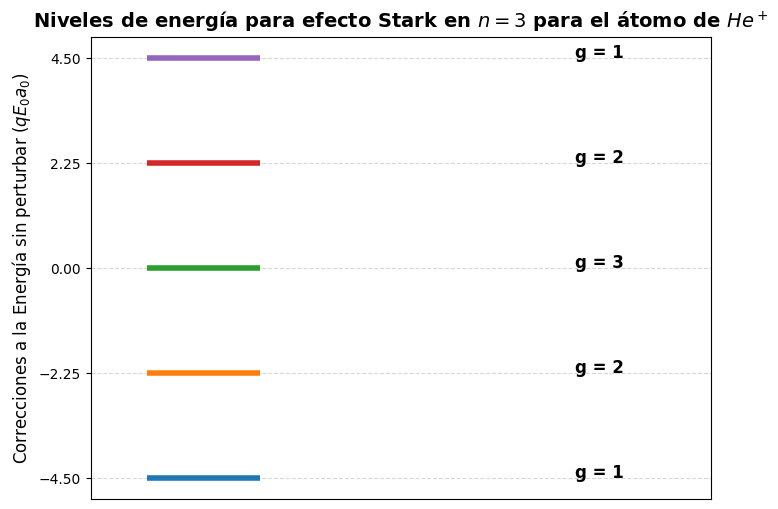

In [16]:
# Importo librerías:
import matplotlib.pyplot as plt

# Separo los autovalores unicos y cuento la degeneración:
ener_vals, degen = np.unique(eigenval, return_counts=True)

# Defino los colores que van a rotar entre subplots
colors = plt.rcParams["axes.prop_cycle"]()

# Grafico

fig, ax = plt.subplots(figsize=(8,6))

for energy, g in zip(ener_vals, degen):
    
    # Línea de nivel
    c = next(colors)["color"]
    ax.hlines(energy, 0, 1, linewidth=4, color=c)

    # Degeneración
    ax.text(3.8, energy, f"g = {g}", fontsize=12, weight="bold")

# Configuración de ejes y estilo
#ax.set_ylim(0.5, len(energyGroups)+0.5)
ax.set_xlim(-0.5, 5)
ax.set_ylabel(r"Correcciones a la Energía sin perturbar ($qE_0a_0$)", fontsize=12)
ax.set_xlabel("")
ax.set_xticks([])
ax.set_yticks(ener_vals)
ax.grid(axis="y", linestyle="--", alpha=0.5)

# Título
ax.set_title(rf"Niveles de energía para efecto Stark en $n = {n}$ para el átomo de $He^+$",
             fontsize=14, fontweight="bold")

plt.show()